# Data Understanding

## Contrasting normal samples and anomalies

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

path = "C:/Users/David/source/repos/EnergyProcessDataDAD/"
source = path + "EnergyDF_extended.h5"

energy_df = pd.read_hdf(source)

In [27]:
def moving_average(array, length = 2):
    """Compute the moving average by means of a discrete convolution"""
    if length < 1:
        raise ValueError("Cannot compute a moving average for a window smaller than 1")
    return np.convolve(array, np.ones(length), mode="same") / length

def plot_samples(df, label, num_samples = 4):
    df = df[df["label"] == label]
    
    fig, axes = plt.subplots(nrows = num_samples, ncols = 1, figsize = (12, num_samples*3))
    
    for idx, (sample_nr, sample) in enumerate(df.groupby(level = 0)):
        
        if idx >= num_samples:
            break;
        
        #plot_sample(sample, axes[idx])
        plot_joint_current(sample, axes[idx])

def plot_sample(df, axis):
    time = df["timestamp"].to_numpy()
    torque = df["output_double_register_25"].to_numpy()
    current = df["actual_robot_current"].to_numpy()
    current_smooth = moving_average(current, length = 5)
    robot_voltage = df["actual_robot_voltage"].to_numpy()
    robot_voltage_smooth = moving_average(robot_voltage, length = 5)
    main_voltage = df["actual_main_voltage"].to_numpy()
    main_voltage_smooth = moving_average(main_voltage, length = 5)
    
    screw_tightening = df["output_bit_register_67"].to_numpy()
    move_home = df["output_bit_register_65"].to_numpy()
    
    # Plot torque and current on the left y axis
    axis.plot(time, torque, "-r")
    axis.plot(time, current,"-c", linewidth = 1)
    axis.plot(time, current_smooth,"-b", linewidth = 1)
    axis.legend(["torque", "current", "smooth current"], loc = "upper left")
    
    # add markers which indicate the process
    axis.plot(time, screw_tightening)
    axis.plot(time, move_home)
    
    # Plot the voltages
    ax2 = axis.twinx()
    avg_voltage = np.mean(main_voltage)
    ax2.set_ylim(avg_voltage*0.98, avg_voltage*1.02)   
    ax2.plot(time, robot_voltage_smooth, "y", linewidth = 1)
    ax2.plot(time, main_voltage_smooth, "g", linewidth = 1)
    ax2.legend(["robot voltage", "main voltage"])
    
    # Plot the difference between the voltages
    #ax3 = axis.twinx()
    #diff_voltage = robot_voltage_smooth - main_voltage_smooth
    #avg_voltage = np.mean(diff_voltage)
    #ax3.set_ylim(0, avg_voltage*2)   
    #ax3.plot(time, diff_voltage, "y", linewidth = 1)
    
def plot_joint_current(df, axis):
    time = df["timestamp"].to_numpy()
    torque = df["output_double_register_25"].to_numpy()
    
    screw_tightening = df["output_bit_register_67"].to_numpy()
    move_home = df["output_bit_register_65"].to_numpy()
    
    # add markers which indicate the process
    axis.plot(time, screw_tightening)
    axis.plot(time, move_home)
    
    # collect all current measurements of the robot's joints
    current_joints = df[[f"actual_current_{i}" for i in range(6)]].to_numpy()
    current_all_joints = np.abs(current_joints.sum(axis=1))
    
    # collect all control current of the robot's joints
    control_currents = df[[f"joint_control_output_{i}" for i in range(6)]].to_numpy()
    all_control_currents = np.abs(control_currents.sum(axis=1))
    
    # collect all target currents of the robot's joints
    target_currents = df[[f"target_current_{i}" for i in range(6)]].to_numpy()
    all_target_currents = np.abs(target_currents.sum(axis=1))
    
    # collect all actual joint voltages
    joint_voltages = df[[f"actual_joint_voltage_{i}" for i in range(6)]].to_numpy()
    
    # Plot the current of the robot's joints
    ax2 = axis.twinx()
    #ax2.plot(time, current_all_joints, "-k", linewidth = 1)
    
    #colors = ["y", "r", "m", "b", "c", "g"]
    #for i in range(6):
    #    joint = current_joints[:,i]
    #    ax2.plot(time, joint, colors[i], linewidth = 1)
    #ax2.legend(["all", "j0", "j1", "j2", "j3", "j4", "j5"])
    
    ax_num = 1
    
    axis.plot(time, torque)
    ax2.plot(time, np.abs(current_joints[:, ax_num]), "r", linewidth = 1)
    ax2.plot(time, control_currents[:, ax_num], "m", linewidth = 2)
    ax2.plot(time, target_currents[:, ax_num], "b", linewidth = 1)
    ax2.legend(["actual current", "control output", "target_current"])
    
    ax3 = axis.twinx()
    ax3.spines["right"].set_position(("axes", 1.2))
    ax3.plot(time, joint_voltages[:,  ax_num], "y", linewidth = 1)
    ax3.set_ylim(46.5,48.5)
    ax3.legend(["actual voltage"])
    

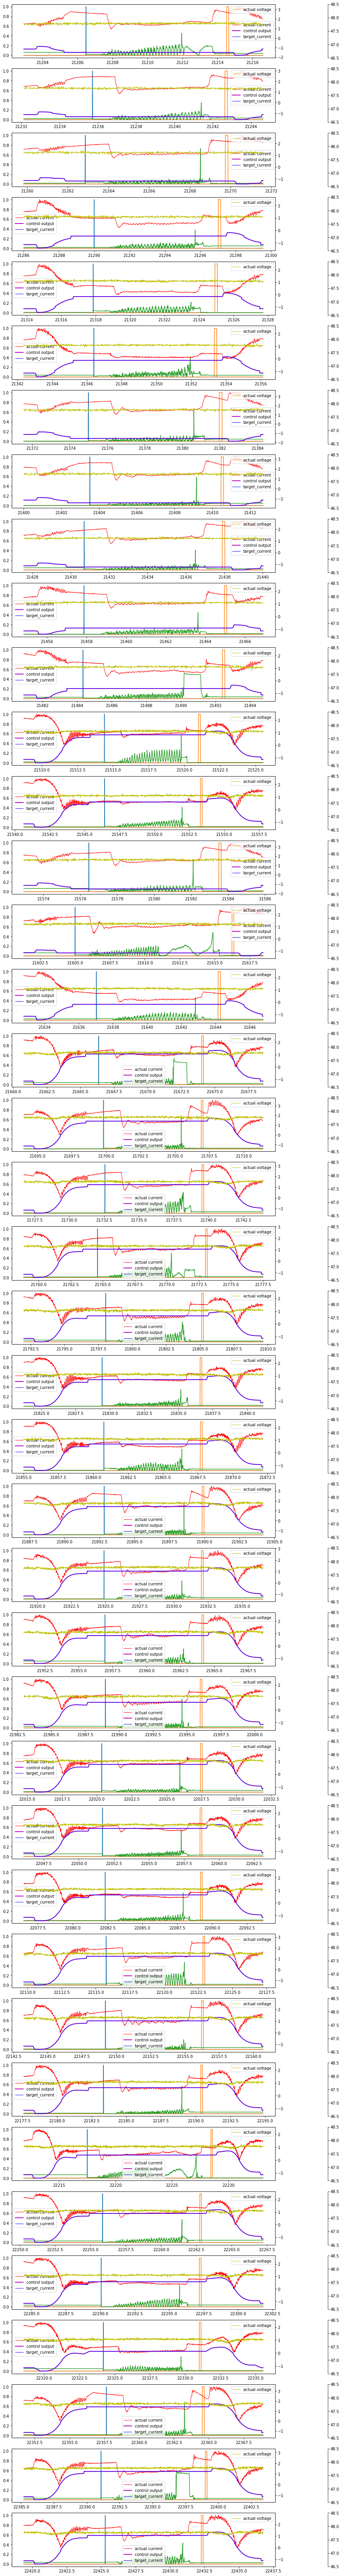

In [28]:
plot_samples(energy_df, 0, num_samples = 40)

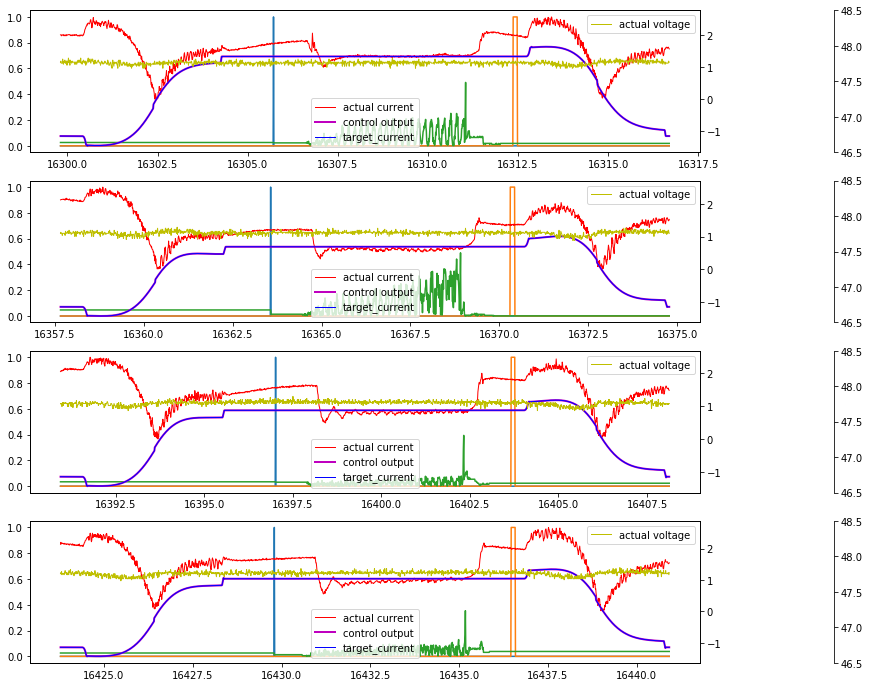

In [29]:
# Anomaly: damaged screw
plot_samples(energy_df, 1, num_samples = 4)

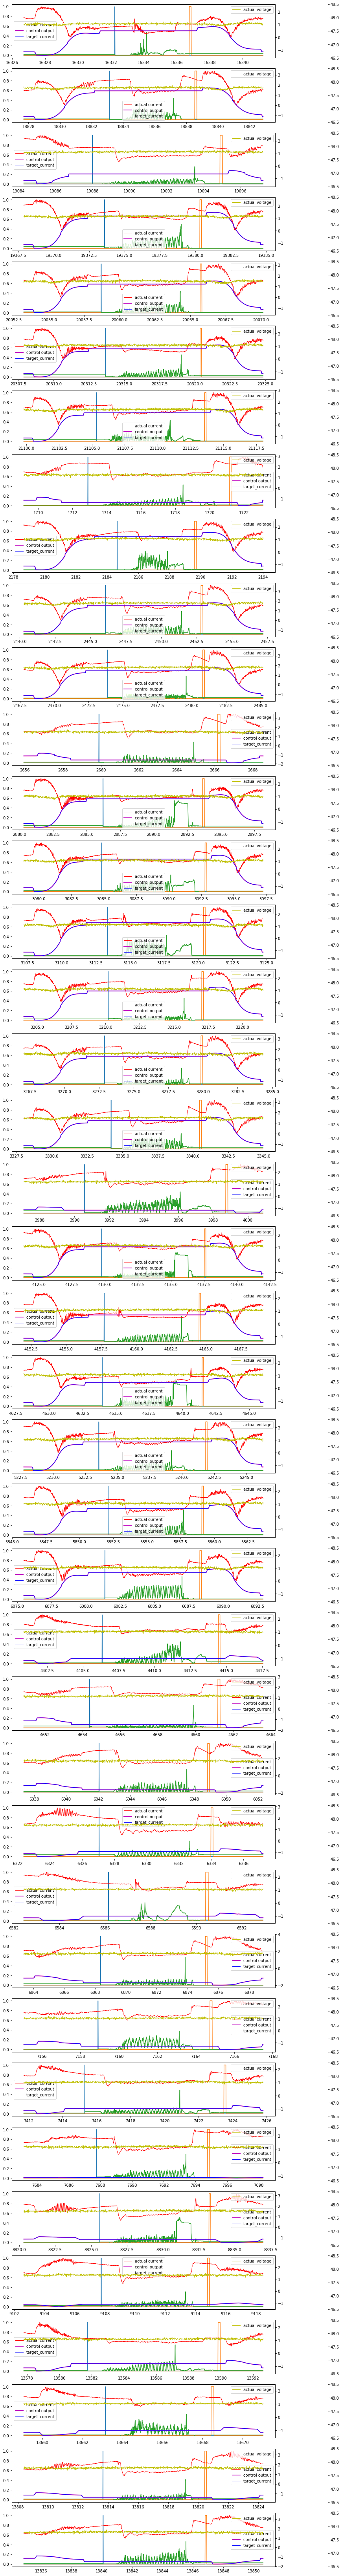

In [30]:
# Anomaly: extra assembly component
plot_samples(energy_df, 2, num_samples = 40)

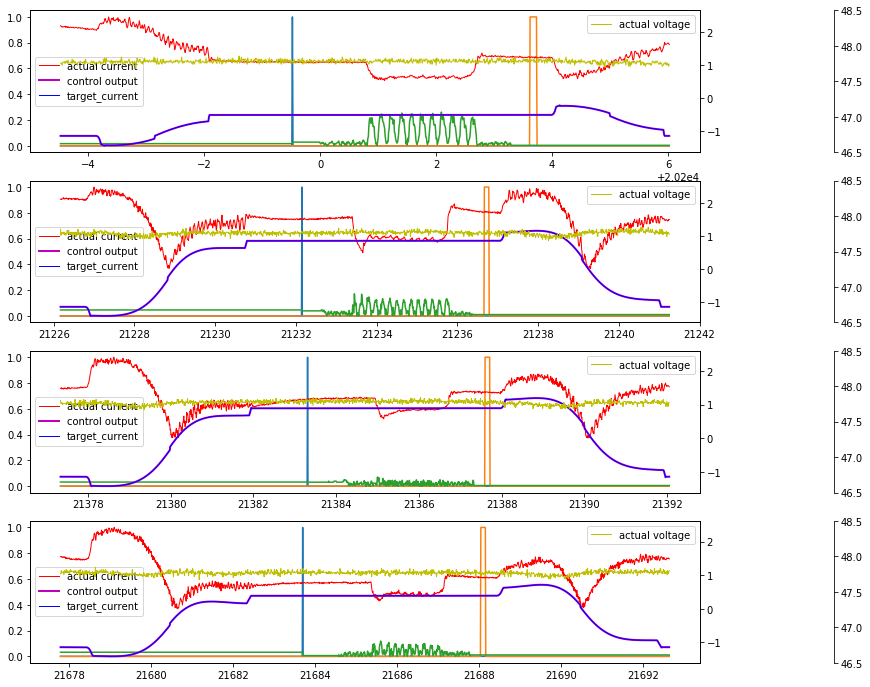

In [31]:
# Anomaly: Missing Screw
plot_samples(energy_df, 3, num_samples = 4)

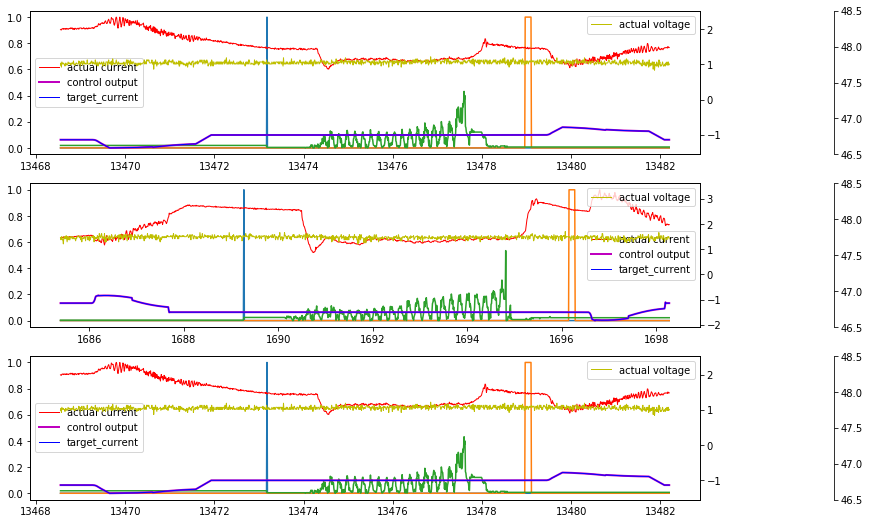

In [32]:
plot_samples(energy_df, 4, num_samples = 3)

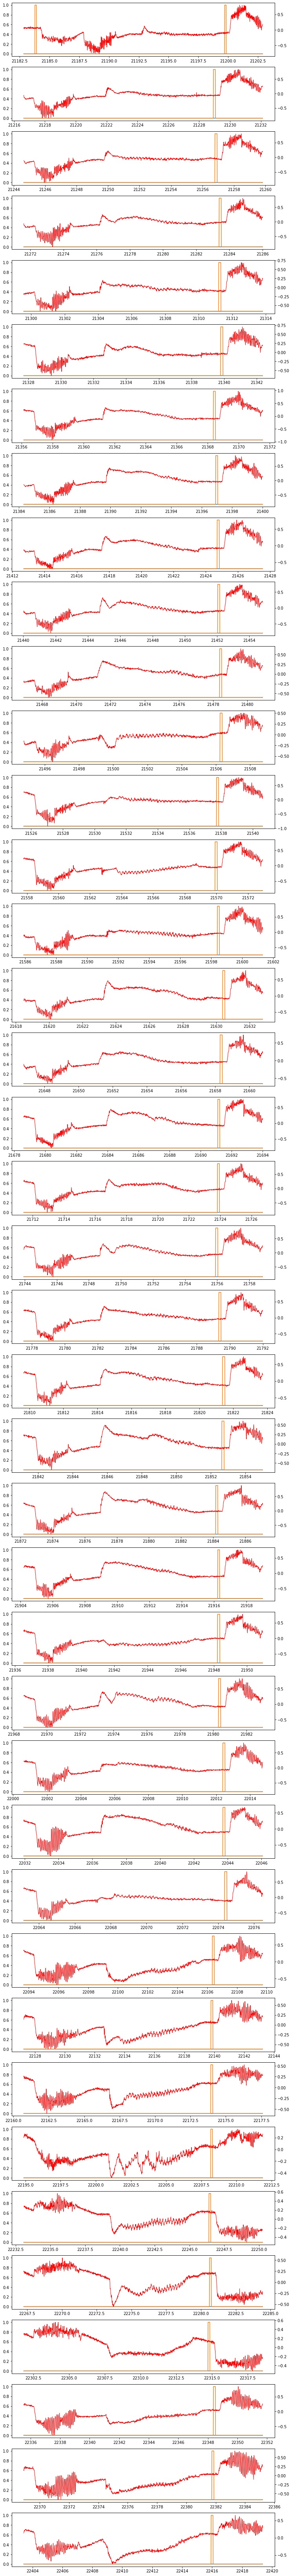

In [109]:
# Loosening
plot_samples(energy_df, 5, num_samples = 8)

## Averaging Timeseries

In [161]:
import gc
gc.collect()

20

In [79]:
gb = 
gb.groupby("label").size()

label
0    1420
1     221
2     183
3     218
4       3
5    2049
dtype: int64